# Pattern Recognition_Project 1(Part 2 without stop words)

Remove html tags

https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string


In [1]:
import re
import numpy as np

def cleanhtml(file):
  cleanr = re.compile("(<.*?>)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
  cleantext = re.sub(cleanr, '', file) 
  cleantext =''.join([i for i in cleantext if not i.isdigit()])
  return cleantext

Read all text files from a folder

https://automating-gis-processes.github.io/FEC/Day3-reading-files.html

In [2]:
import glob

DataPathList_Train_Pos = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/train/pos/*.txt')
print(len(DataPathList_Train_Pos) )  #number of items

DataPathList_Train_Neg = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/train/neg/*.txt')
print(len(DataPathList_Train_Neg) )  #number of items

DataPathList_Test_Pos = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/test/pos+/*.txt')
print(len(DataPathList_Test_Pos) )  #number of items

DataPathList_Test_Neg = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/test/neg-/*.txt')
print(len(DataPathList_Test_Neg) )  #number of items

Data_Train= []
Data_Test= []

for fp in DataPathList_Train_Pos:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Train.append(text)

for fp in DataPathList_Train_Neg:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Train.append(text)

for fp in DataPathList_Test_Pos:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Test.append(text)

for fp in DataPathList_Test_Neg:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Test.append(text)

12500
12500
2500
2500


In [3]:
np.save('Data_TrainP2WSW.npy', Data_Train)
np.save('Data_TestP2WSW.npy', Data_Test)

In [16]:
Data_Train=np.load('Data_TrainP2WSW.npy')
Data_Test=np.load('Data_TestP2WSW.npy')

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm=None, ngram_range=(1,3),stop_words='english')
vectorizer.fit(Data_Train)
matrix_train=vectorizer.transform(Data_Train)
print(matrix_train.shape)
matrix_test=vectorizer.transform(Data_Test)
print(matrix_test.shape)

(25000, 4399861)
(5000, 4399861)


In [17]:
from sklearn.cross_validation import train_test_split

Class = [1 if i < 12500 else 0 for i in range(25000)]

data_train, data_validation, class_train, class_validation = train_test_split(
    matrix_train, Class, test_size=0.33, random_state=42
)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=50,max_depth=5)
clf2.fit(data_train, class_train )
predicted = clf2.predict(data_validation)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
import matplotlib.pyplot as plt

print ('Accuracy with Train Test Split :',accuracy_score(class_validation,predicted)*100)

Accuracy with Train Test Split : 69.41818181818182


Test set Accuracy: 69.22
confusion_matrix:
 [[1540  960]
 [ 579 1921]]


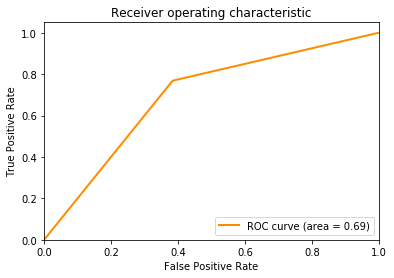

In [20]:
Class = [1 if i < 2500 else 0 for i in range(5000)]
predicted = clf2.predict(matrix_test)
print ("Test set Accuracy:" , accuracy_score(Class, predicted)*100)
print ('confusion_matrix:\n',confusion_matrix(Class,predicted))

fpr = []
tpr = []
roc_auc = []
fpr, tpr, _ = roc_curve(Class, predicted)
roc_auc = auc(fpr, tpr)
   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()